# Линейное уравнение

## Задаём точки с шумом

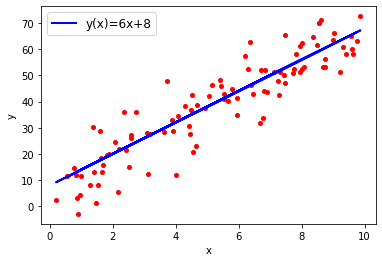

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# real func: y=6x+8
# общий вид: y=ax+b

real_a = 6
real_b = 8

x = 10*np.random.rand(100, 1)
y_noised = real_a*x + real_b + np.random.randn(*(x.shape))*8  # зашумлённый y
y_real = real_a*x + real_b 

plt.plot(x, y_noised, 'r.', markersize=8)
plt.plot(x, y_real, 'b-', linewidth=2, label='y(x)=6x+8')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Нормальное уравнение

In [122]:
x_adv = np.c_[x, np.ones((100, 1))]  # добавляем столбец для коэфицента b. Первый столбец - коэф a, второй - b
theta_best = np.linalg.inv(x_adv.T.dot(x_adv)).dot(x_adv.T).dot(y_noised)  # inv () из модуля linear algebra вернет обратную матрицу, метод dot () умножает матрицы

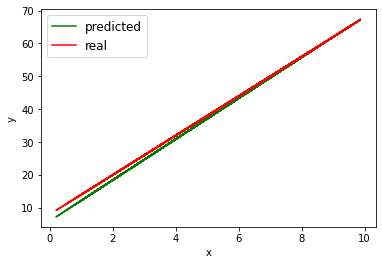

In [123]:
y_predict = x_adv.dot(theta_best)

plt.plot(x, y_predict, 'g', label='predicted')
plt.plot(x, y_real, 'r', label='real')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Градиентный спуск

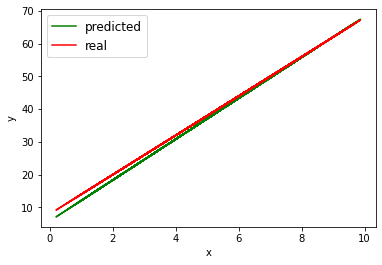

In [124]:
def gd_desc(x, y, eta = 0.01, n_iter = 1000):
    m = x.shape[0]  # количество строк в X (для нормировки)
    theta = np.random.randn(2, 1)*5  # берём рандомные коэффициенты a и b

    for i in range(n_iter):
        grads = 2/m * x_adv.T.dot(x_adv.dot(theta) - y)
        theta = theta - eta * grads

    return theta

theta_best_gr = gd_desc(x,y_noised)  # первый элемент - a, второй - b

y_predict_gr = theta_best_gr[0]*x + theta_best_gr[1]

plt.plot(x, y_predict_gr, 'g', label='predicted')
plt.plot(x, y_real, 'r', label='real')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Нелинейное уравнение (парабола)

## Задали точки с шумом

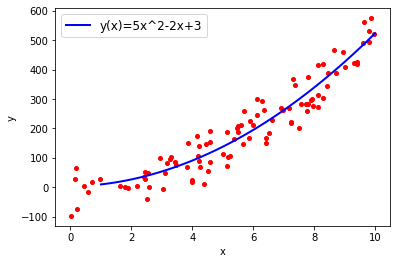

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# real func: y=5x^2-2x+3
# общий вид: y=ax^2+bx+c 

real_a = 5
real_b = 2
real_c = 3

x = np.random.rand(100, 1) * 10
plt_x = np.linspace(1, 10, 100) 

y_noised = real_a*x**2 + real_b*x + real_c + np.random.randn(*(x.shape))*50  # зашумлённый y
y_real = real_a*plt_x**2 + real_b*plt_x + real_c

plt.plot(x, y_noised, 'r.', markersize=8)
plt.plot(plt_x, y_real, 'b-', linewidth=2, label='y(x)=5x^2-2x+3')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Нормальное уравнение

Text(0, 0.5, 'y')

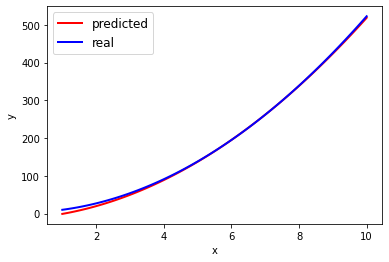

In [171]:
X_2 = np.c_[x**2, x]
X_2_b = np.c_[X_2, np.ones((100, 1))]

theta = np.linalg.inv(X_2_b.T.dot(X_2_b)).dot(X_2_b.T).dot(y_noised)

y_predicted = theta[0]*plt_x**2 + theta[1]*plt_x + theta[2]

plt.plot(plt_x, y_predicted, 'r-', linewidth=2, label='predicted')
plt.plot(plt_x, y_real, 'b-', linewidth=2, label='real')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

## Градиентный спуск

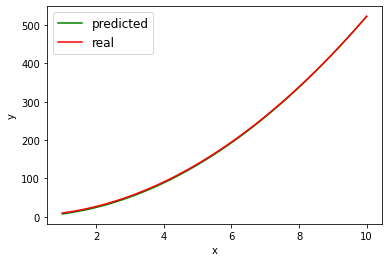

In [172]:
def gd_desc(x, y, eta = 0.0001, n_iter = 10000):
    m = x.shape[0]  # количество строк в X (для нормировки)
    theta = np.random.randn(3, 1)*5  # берём рандомные коэффициенты a и b

    for i in range(n_iter):
        grads = 2/m * X_2_b.T.dot(X_2_b.dot(theta) - y)
        theta = theta - eta * grads

    return theta

theta_gr = gd_desc(x, y_noised)  # первый элемент - a, второй - b
y_predict_gr = theta_gr[0]*plt_x**2 + theta_gr[1]*plt_x + theta_gr[2]

plt.plot(plt_x, y_predict_gr, 'g', label='predicted')
plt.plot(plt_x, y_real, 'r', label='real')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Нелинейное уравнение (синус)

## Задали точки с шумом

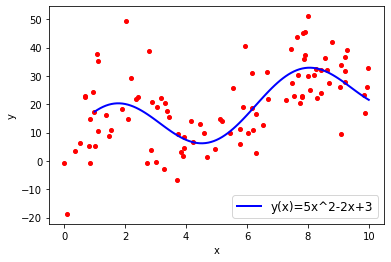

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# real func: y=3sin(x)+2x+7
# общий вид: y=Asin(x)+Bx+С

real_a = 10
real_b = 2
real_c = 7

x = np.random.rand(100, 1) * 10
plt_x = np.linspace(1, 10, 100) 

y_noised = real_a*np.sin(x) + real_b*x + real_c + np.random.randn(*(x.shape))*10  # зашумлённый y
y_real = real_a*np.sin(plt_x) + real_b*plt_x + real_c

plt.plot(x, y_noised, 'r.', markersize=8)
plt.plot(plt_x, y_real, 'b-', linewidth=2, label='y(x)=5x^2-2x+3')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Нормальное уравнение

Text(0, 0.5, 'y')

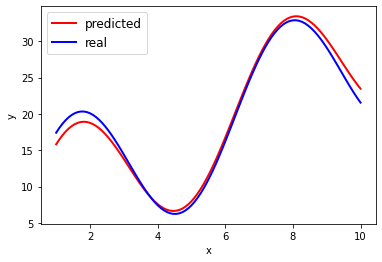

In [189]:
X_2 = np.c_[np.sin(x), x]
X_2_b = np.c_[X_2, np.ones((100, 1))]

theta = np.linalg.inv(X_2_b.T.dot(X_2_b)).dot(X_2_b.T).dot(y_noised)

y_predicted = theta[0]*np.sin(plt_x) + theta[1]*plt_x + theta[2]

plt.plot(plt_x, y_predicted, 'r-', linewidth=2, label='predicted')
plt.plot(plt_x, y_real, 'b-', linewidth=2, label='real')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

## Градиентный спуск

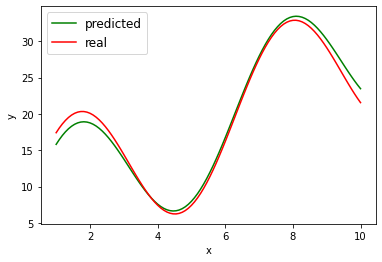

In [200]:
def gd_desc(x, y, eta = 0.001, n_iter = 10000):
    m = x.shape[0]  # количество строк в X (для нормировки)
    theta = np.random.randn(3, 1)*5  # берём рандомные коэффициенты a и b

    for i in range(n_iter):
        grads = 2/m * X_2_b.T.dot(X_2_b.dot(theta) - y)
        theta = theta - eta * grads

    return theta

theta_gr = gd_desc(x, y_noised)  # первый элемент - a, второй - b
y_predict_gr = theta_gr[0]*np.sin(plt_x) + theta_gr[1]*plt_x + theta_gr[2]

plt.plot(plt_x, y_predict_gr, 'g', label='predicted')
plt.plot(plt_x, y_real, 'r', label='real')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Нелинейное уравнение (приближение синуса полиномом)

## Задали точки с шумом

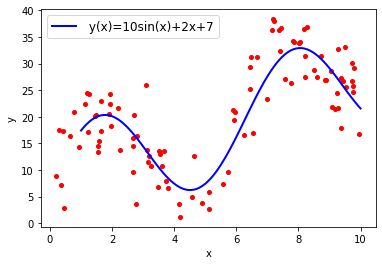

In [231]:
import numpy as np
import matplotlib.pyplot as plt

# real func: y=10sin(x)+2x+7
# общий вид: y=Asin(x)+Bx+С

real_a = 10
real_b = 2
real_c = 7

x = np.random.rand(100, 1) * 10
plt_x = np.linspace(1, 10, 100) 

y_noised = real_a*np.sin(x) + real_b*x + real_c + np.random.randn(*(x.shape))*5  # зашумлённый y
y_real = real_a*np.sin(plt_x) + real_b*plt_x + real_c

plt.plot(x, y_noised, 'r.', markersize=8)
plt.plot(plt_x, y_real, 'b-', linewidth=2, label=' y(x)=10sin(x)+2x+7')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Нормальное уравнение

Text(0, 0.5, 'y')

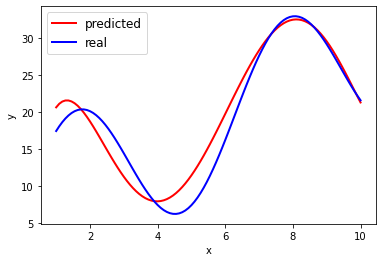

In [232]:
X_3 = np.c_[x**5, x**4]
X_3 = np.c_[X_3, x**3]
X_3 = np.c_[X_3, x**2]
X_3 = np.c_[X_3, x]
X_3 = np.c_[X_3, np.ones((100, 1))]

theta = np.linalg.inv(X_3.T.dot(X_3)).dot(X_3.T).dot(y_noised)

y_predicted = theta[0]*plt_x**5 + theta[1]*plt_x**4 + theta[2]*plt_x**3 + theta[3]*plt_x**2 + theta[4]*plt_x + theta[5]

plt.plot(plt_x, y_predicted, 'r-', linewidth=2, label='predicted')
plt.plot(plt_x, y_real, 'b-', linewidth=2, label='real')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

## Градиентный спуск

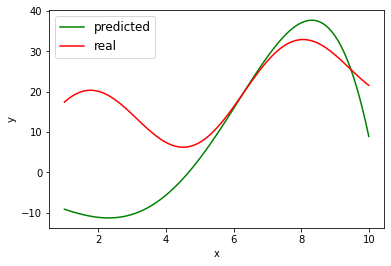

In [240]:
def gd_desc(x, y, eta = 0.0000000001, n_iter = 100000000):
    m = x.shape[0]  # количество стрток в X (для нормировки)
    theta = np.random.randn(6, 1)*10  # берём рандомные коэффициенты 

    for i in range(n_iter):
        grads = 2/m * X_3.T.dot(X_3.dot(theta) - y)
        theta = theta - eta * grads

    return theta

theta_gr = gd_desc(x, y_noised)  # первый элемент - a, второй - b
y_predict_gr = theta_gr[0]*plt_x**5 + theta_gr[1]*plt_x**4 + theta_gr[2]*plt_x**3 + theta_gr[3]*plt_x**2 + theta_gr[4]*plt_x + theta_gr[5]

plt.plot(plt_x, y_predict_gr, 'g', label='predicted')
plt.plot(plt_x, y_real, 'r', label='real')
plt.legend(prop={'size': 12})
plt.xlabel('x')
plt.ylabel('y')

plt.show()